**Import the Libraries**

In [8]:
from qiskit import *


**Define the oracle circuit**

In [9]:
def oracle(qc, target):
    qc.x(0)
    qc.cz(0, 1)
    qc.x(0)

**Define diffusion operator**

In [10]:
def diffusion(qc):
    qc.h(range(2))
    qc.x(range(2))
    qc.cz(0,1)
    qc.x(range(2))
    qc.h(range(2))


__Initialize quantum circuit__

In [11]:

qc = QuantumCircuit(2, 2)
# Apply Hadamard gate to both qubits
qc.h(range(2))

# Set number of iterations
iterations = 2

# Apply Grover's algorithm
for i in range(iterations):
    oracle(qc, '10')
    diffusion(qc)

# Measure the qubits
qc.measure(range(2), range(2))

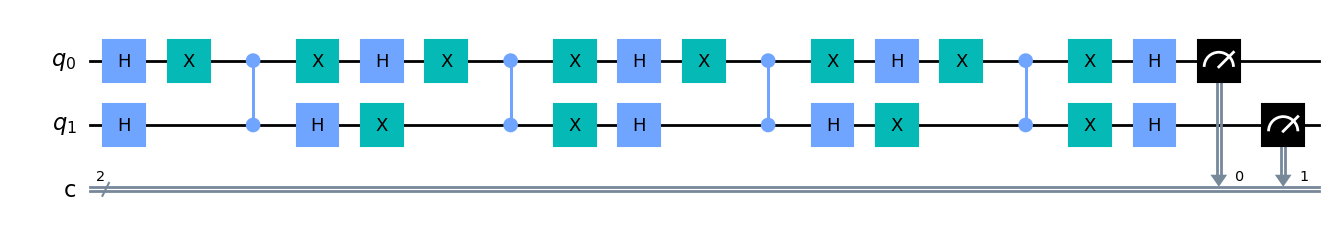

In [12]:
qc.draw(output="mpl")#see the circuit

__Execute the circuit on a simulator__

In [6]:
# Execute the circuit on a simulator
simulator=Aer.get_backend('qasm_simulator')
job=execute(qc,backend=simulator,shots=1000)#default shots=1024
job_monitor(job)



Job Status: job has successfully run


In [7]:
result=job.result()
result

Result(backend_name='qasm_simulator', backend_version='0.12.0', qobj_id='', job_id='9ac199cb-c949-4b81-b13c-33dbd3e6dcd7', success=True, results=[ExperimentResult(shots=1000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 246, '0x0': 264, '0x2': 276, '0x3': 214}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=3.141592653589793, memory_slots=2, metadata=None, n_qubits=2, name='circuit-114', qreg_sizes=[['q', 2]]), status=DONE, seed_simulator=354377236, metadata={'batched_shots_optimization': False, 'method': 'statevector', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'sample_measure_time': 0.0002292, 'input_qubit_map': [[0, 0], [1, 1]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 16, 'fusion': {'enabled': True, 'threshold': 14, 'max_fused_qubits': 5, 'applied': False}}, time_taken=0.0013239)], date=2023-06-06T19:43:27.021036, status=COMPLET

In [8]:
# Get the results and print them
results = job.result().get_counts()
print(results)

{'01': 246, '00': 264, '10': 276, '11': 214}


**Plot the histogram of results**

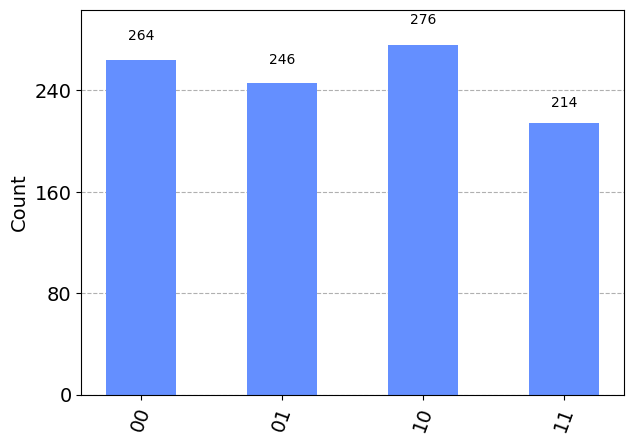

In [9]:
from qiskit.visualization import plot_histogram
plot_histogram(results)

In [10]:
#converge counts to probabilities
total_counts = sum(results.values())
prob_counts = {outcome: count/total_counts for outcome, count in results.items()}


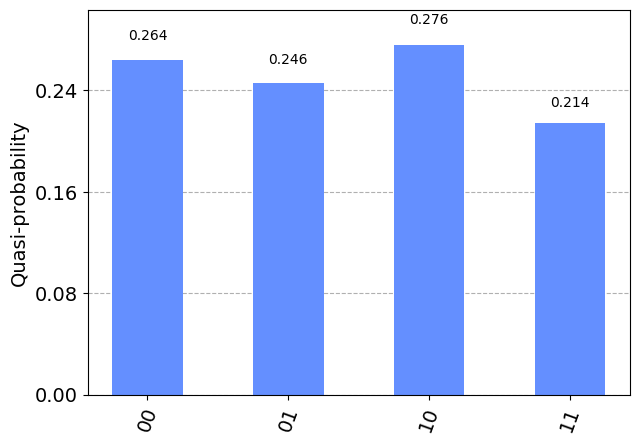

In [11]:
plot_histogram(prob_counts)

__Result and Conclusion__

The provided code represents a successful implementation of Grover's quantum search algorithm, aimed at finding a specific state in two-qubit system. The algorithm employs a specially-designed oracle to "mark" the '10' state and a diffusion function to amplify its probability in the superposition. This procedure is iterated twice to increase the likelihood of finding the marked state. Upon executing the quantum circuit and measuring the states, the state '10' emerges as the most frequently observed state with 276 occurrences, demonstrating that Grover's algorithm has effectively amplified its probability. The results validate the enhanced efficiency of quantum algorithms in solving search problems compared to classical methods.

In [1]:
from qiskit import IBMQ

In [2]:
IBMQ.save_account('b09797bc274bc26cbe5d6c5edd27c775e0706eedc28f557e7af6e3d6a179362ed225bb1f1023553d95ceb49ed3ee8b3ebb6352febe08f6da7b27646fc90f457d')

C:\Users\Dahal\AppData\Local\Temp\ipykernel_28660\2184072913.py:1: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('b09797bc274bc26cbe5d6c5edd27c775e0706eedc28f557e7af6e3d6a179362ed225bb1f1023553d95ceb49ed3ee8b3ebb6352febe08f6da7b27646fc90f457d')
C:\Users\Dahal\AppData\Local\Temp\ipykernel_28660\2184072913.py:1: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvide

In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
provider=IBMQ.get_provider('ibm-q')

In [7]:
qcomp=provider.get_backend('ibmq_belem')

In [13]:
job=execute(qc,backend=qcomp)

In [14]:
job

In [15]:
from qiskit.tools.monitor import job_monitor

In [16]:
job_monitor(job)

Job Status: job has successfully run


In [17]:
result=job.result()

In [18]:
plot_histogram=(result.get_counts(qc))

In [21]:
from qiskit.visualization import plot_histogram
plot_histogram

<function qiskit.visualization.counts_visualization.plot_histogram(data, figsize=(7, 5), color=None, number_to_keep=None, sort='asc', target_string=None, legend=None, bar_labels=True, title=None, ax=None, filename=None)>

In [22]:
result

Result(backend_name='ibmq_belem', backend_version='1.2.8', qobj_id='adbe80de-3828-4ad9-8035-c9d19f2b5a4b', job_id='circuit-runner_ci11gthmsdttg76loib0_87b6_0', success=True, results=[ExperimentResult(shots=4000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1157, '0x1': 904, '0x2': 953, '0x3': 986}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=3.141592653589793, memory_slots=2, metadata={}, n_qubits=5, name='circuit-114', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), status=done)], date=2023-06-08 13:06:03-05:00, status=Successful completion, header=QobjHeader(backend_name='ibmq_belem', backend_version='1.2.8', _ibm_tracing_={'uber-trace-id': '77e7e0cbe2354e01a2c25a3953bff434:d9ba2da74166b365:51fbf4c7c3c01c85:1'}), execution_id='20300538-0627-11ee-bfc2-b02628f7f59e', time_taken=2.885841058, error=None, client_version={'qiskit': '0.43.0'})

In [23]:
result.get_counts(qc)

{'00': 1157, '01': 904, '10': 953, '11': 986}